In [1]:
%matplotlib widget

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import sys

In [3]:
condbased_res1000 = pd.read_csv("locomotec-res-condfuzz-python", delim_whitespace=True)

In [4]:
condbased_res250 = pd.read_csv("locomotec-history-condfuzz-250", delim_whitespace=True)
condbased_res500 = pd.read_csv("locomotec-history-condfuzz-500", delim_whitespace=True)
condbased_res750 = pd.read_csv("locomotec-history-condfuzz-750", delim_whitespace=True)

In [5]:
def dataframe_chosen_cols_to_csv(df, csv_file):
    subset_df = df[['uvMissSurface','uvExcessHuman','fuzzOpTimes']].copy()
    subset_df.to_csv(csv_file, index=False, header=False)

In [6]:
dataframe_chosen_cols_to_csv(condbased_res1000, "condbased_res1000.pf")
dataframe_chosen_cols_to_csv(condbased_res250,  "condbased_history250.pf")
dataframe_chosen_cols_to_csv(condbased_res500,  "condbased_history500.pf")
dataframe_chosen_cols_to_csv(condbased_res750,  "condbased_history750.pf")

In [7]:
def plot_3d_resultset_history(frontDFAttribs, graph_title, savefigFilename):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')    
    default_alpha = 1.0
    
    for col in frontDFAttribs:
        df = frontDFAttribs[col]
        ax.scatter(df["uvMissSurface"], df["uvExcessHuman"], df["fuzzOpTimes"], c=col, alpha=default_alpha)

    ax.view_init(20,110)

    ax.set_xlabel("UVC Disinfection\n Surface Miss")
    ax.set_ylabel("UVC Excess\n Human Exposure")
    ax.set_zlabel("Fuzzing Operation Times")
    ax.set_title(graph_title)
    plt.tight_layout(pad=0.05)
    #plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)
    plt.savefig(savefigFilename)
    plt.show()

In [26]:
def plot_3d_resultset_history_as_subplots(frontDFAttribs, graph_title, savefigFilename, xmax, ymax, zmax):
    labelfont = 8
    xwidth = 2
    xp = xwidth
    yp = int(len(frontDFAttribs) / xwidth)
    fig = plt.figure()
    default_alpha = 1.0
    
    ai = 1
    for col in frontDFAttribs:
        df = frontDFAttribs[col]
        ax = fig.add_subplot(xp, yp, ai, projection="3d") 
        ax.scatter(df["uvMissSurface"], df["uvExcessHuman"], df["fuzzOpTimes"], c=col, alpha=default_alpha)
        
        #ax.view_init(20,110)
        ax.set_xlim(0, xmax)
        ax.set_ylim(0, ymax)
        ax.set_zlim(0, zmax)
        ax.set_xlabel("UVC Disinfection\n Surface Miss", fontsize=labelfont)
        ax.set_ylabel("UVC Excess\n Human Exposure", fontsize=labelfont)
        ax.set_zlabel("Total Fuzzing \nOperation Times", fontsize=labelfont)
        
        ai += 1

    plt.suptitle(graph_title)
    plt.tight_layout(pad=0.05)
    plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.4, hspace=0.4)
    plt.savefig(savefigFilename)
    plt.show()


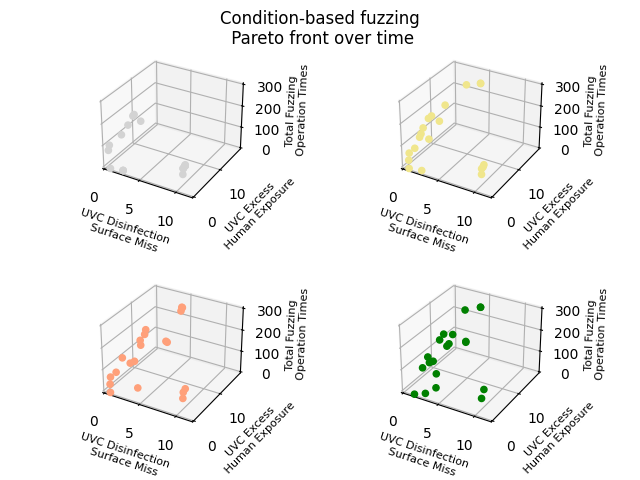

In [27]:
res_df_attribs = {"lightgray": condbased_res250, 
                    "khaki":condbased_res500, 
                    "lightsalmon": condbased_res750, 
                    "Green": condbased_res1000 }

xmax = 12
ymax = 18
zmax = 300
                    
plot_3d_resultset_history_as_subplots(res_df_attribs, "Condition-based fuzzing\n Pareto front over time", "rq3-locomotec-3dfront-history.pdf", xmax, ymax, zmax)